# O2TV FFT v2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
googleSheetId='1MVYvBGtrR2FAJPOdUL9mhttbZecky_S20j4ix9pr7ns'
worksheetName='reboots_CSV'
path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId,
    worksheetName
)

data = pd.read_csv(path,parse_dates=["Timestamp"],index_col=["Timestamp"])

In [3]:
data.head()

,Count
Timestamp,
2020-02-22 03:00:00,149
2020-02-22 04:00:00,147
2020-02-22 05:00:00,284
2020-02-22 06:00:00,740
2020-02-22 07:00:00,1750


In [4]:
data['Date']=data.index.values
data['Ticks']=range(0,len(data.index.values))

Real numbers

In [5]:
graphdata=data

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

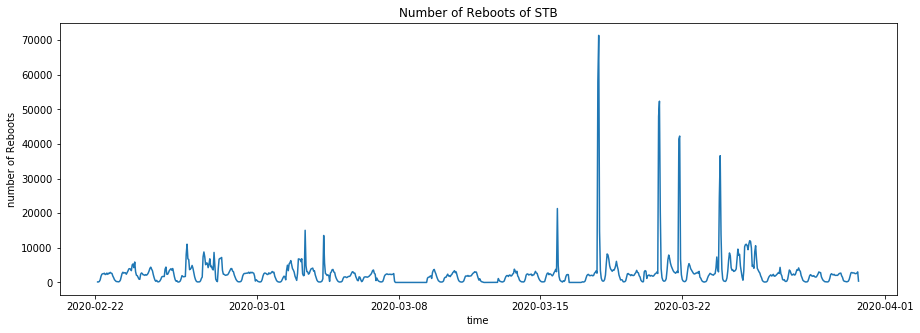

In [6]:
plt.figure(figsize=(15,5))
plt.title('Number of Reboots of STB')
plt.plot(graphdata.Date, graphdata.Count)
plt.xlabel('time')
plt.ylabel('number of Reboots')
plt.show

### Training period
Daily periodicity with period T=24h.

In [7]:
trainingdata=data.loc['2020-02-29':'2020-03-01',:]

In [8]:
A=trainingdata.Count.mean()
B=(trainingdata.Count.max()-trainingdata.Count.min())/2
Fi=49 #estimate
T=24 #period=24h
Omega=2*np.pi/T

In [9]:
print(A)
print(B)

1779.75
1514.0


In [10]:
data['SinTrend']=A+B*np.sin(Fi+Omega*data.Ticks)

In [11]:
data['CountWithoutSinTrend']=data.Count-data.SinTrend

In [12]:
graphdata=data.loc['2020-02-29':'2020-03-04',:]

<function matplotlib.pyplot.show(*args, **kw)>

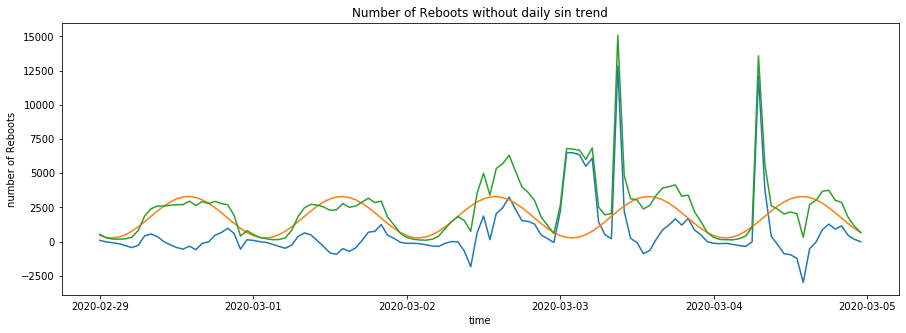

In [13]:
plt.figure(figsize=(15,5))
plt.title('Number of Reboots without daily sin trend')
plt.plot(graphdata.Date, graphdata.CountWithoutSinTrend)
plt.plot(graphdata.Date, graphdata.SinTrend)
plt.plot(graphdata.Date, graphdata.Count)
#plt.xticks(data.index[::100])
plt.xlabel('time')
plt.ylabel('number of Reboots')
plt.show

Daily periodicity with period T=12h. It represents morning and aftrenoon peeks.

In [14]:
trainingdata=data.loc['2020-02-29':'2020-03-01',:]

In [15]:
trainingdata.CountWithoutSinTrend.min()

-930.8232313057156

In [16]:
A=trainingdata.CountWithoutSinTrend.mean()
B=(trainingdata.CountWithoutSinTrend.max()-trainingdata.CountWithoutSinTrend.min())/2
Fi=11.6 #estimate
T=12 #period = 12 hours
Omega=2*np.pi/T

In [17]:
print(A)
print(B)

6.631732200427602e-14
1084.4666836607712


In [18]:
data['SinPeriodicity']=A+B*np.sin(Fi+Omega*data.Ticks)

In [19]:
graphdata=data.loc['2020-02-29':'2020-03-13',:]

<function matplotlib.pyplot.show(*args, **kw)>

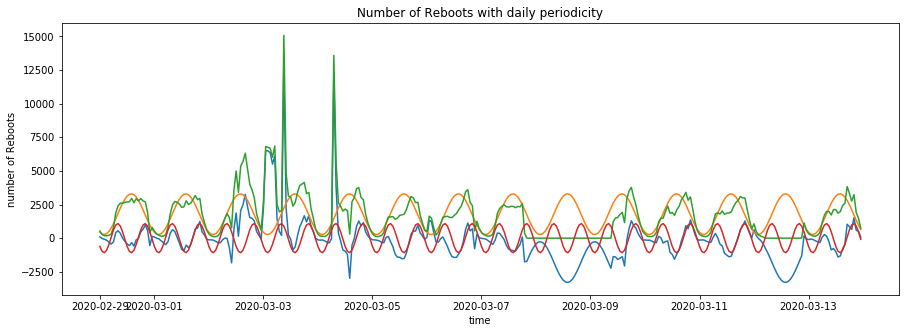

In [20]:
plt.figure(figsize=(15,5))
plt.title('Number of Reboots with daily periodicity')
plt.plot(graphdata.Date, graphdata.CountWithoutSinTrend)
plt.plot(graphdata.Date, graphdata.SinTrend)
plt.plot(graphdata.Date, graphdata.Count)
plt.plot(graphdata.Date, graphdata.SinPeriodicity)
#plt.xticks(data.index[::100])
plt.xlabel('time')
plt.ylabel('number of Reboots')
plt.show

### Real numbers
Prediction on trainign period

In [21]:
data['CountPrediction']=data.SinTrend+data.SinPeriodicity

In [22]:
graphdata=data.loc['2020-02-29':'2020-03-02',:]

<function matplotlib.pyplot.show(*args, **kw)>

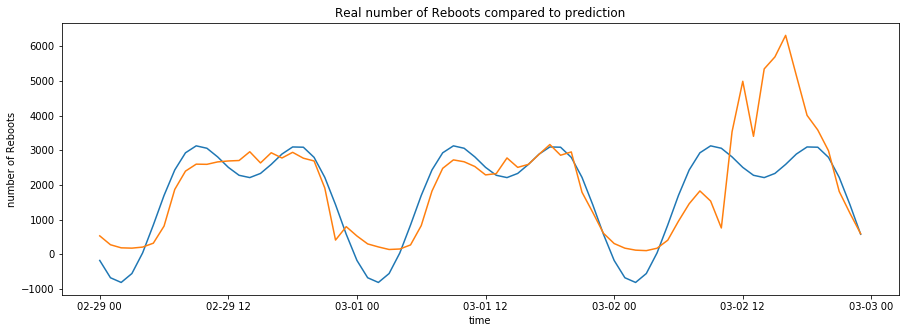

In [23]:
plt.figure(figsize=(15,5))
plt.title('Real number of Reboots compared to prediction')
plt.plot(graphdata.Date, graphdata.CountPrediction)
plt.plot(graphdata.Date, graphdata.Count)
#plt.xticks(data.index[::100])
plt.xlabel('time')
plt.ylabel('number of Reboots')
plt.show

Calculating of range

In [24]:
data['Range']=1.2*data.CountPrediction

In [25]:
graphdata=data

<function matplotlib.pyplot.show(*args, **kw)>

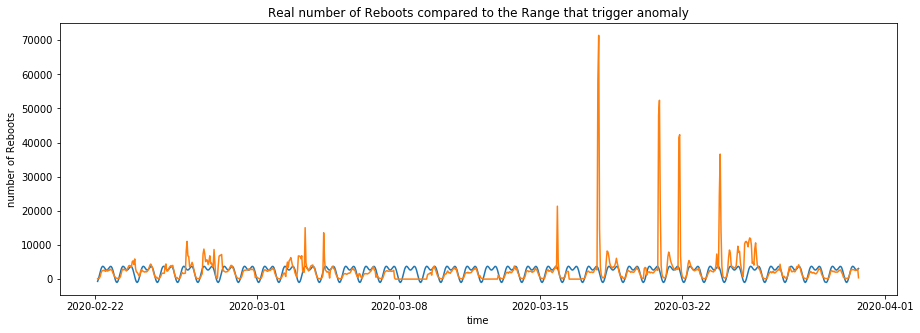

In [26]:
plt.figure(figsize=(15,5))
plt.title('Real number of Reboots compared to the Range that trigger anomaly')
plt.plot(graphdata.Date, graphdata.Range)
plt.plot(graphdata.Date, graphdata.Count)
plt.xlabel('time')
plt.ylabel('number of Reboots')
plt.show